In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
passengers_data = pd.read_csv('passengers.csv')
passengers = passengers_data['#Passengers'].values

Функция для расчета автокорреляции

In [3]:
def calculate_acf(data, max_lag):
    acf = []
    mean = np.mean(data)
    variance = np.var(data)
    n = len(data)

    for lag in range(1, max_lag + 1):
        covariance = np.sum((data[:n-lag] - mean) * (data[lag:] - mean)) / n
        acf_value = covariance / variance
        acf.append(acf_value)

    return acf

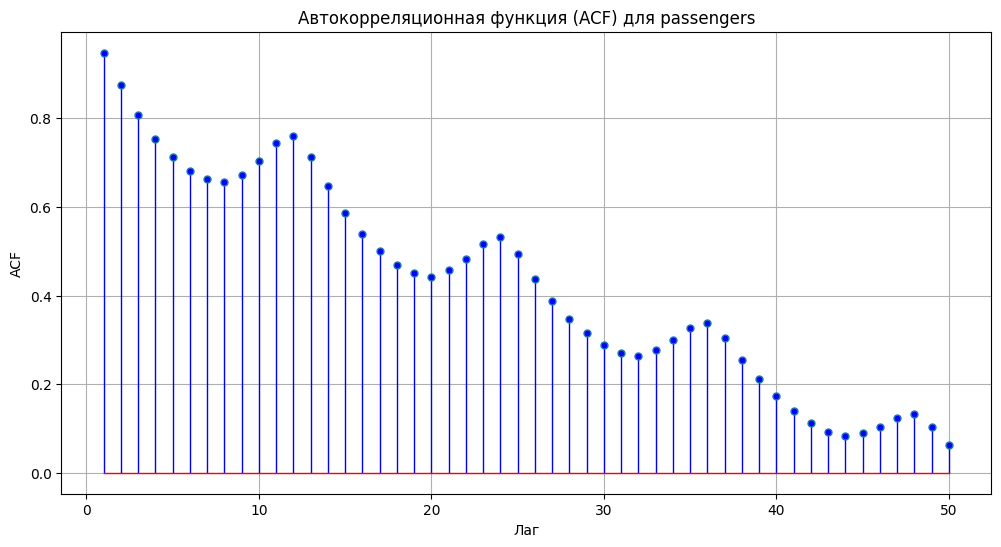

In [7]:
max_lag = 50
acf_values = calculate_acf(passengers, max_lag)

# Построение графика ACF
plt.figure(figsize=(12, 6))
markerline, stemlines, baseline = plt.stem(range(1, max_lag + 1), acf_values)
plt.setp(markerline, 'markerfacecolor', 'b', 'markersize', 5)
plt.setp(stemlines, 'color', 'b', 'linewidth', 1)
plt.setp(baseline, 'color', 'r', 'linewidth', 1)

plt.title('Автокорреляционная функция (ACF) для passengers')
plt.xlabel('Лаг')
plt.ylabel('ACF')
plt.grid(True)
plt.show()

Построение графика ACF с использованием plot_acf


<Figure size 1200x600 with 0 Axes>

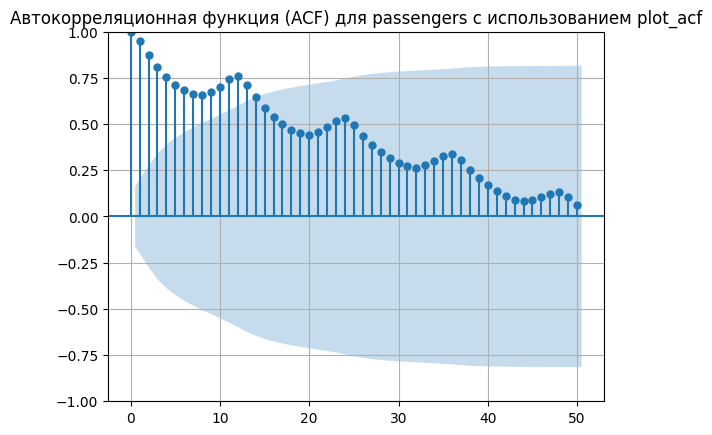

In [5]:
from statsmodels.graphics.tsaplots import plot_acf
 
plt.figure(figsize=(12, 6))
plot_acf(passengers, lags=50)
plt.title('Автокорреляционная функция (ACF) для passengers с использованием plot_acf')
plt.grid(True)
plt.show()


Расчет ACF для датасета births


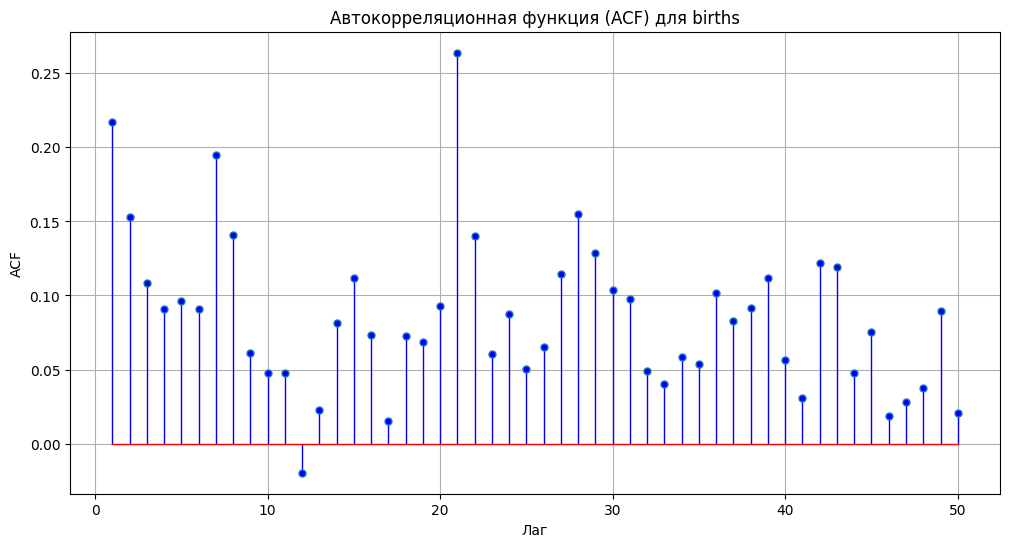

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Загрузка данных
births_data = pd.read_csv('births.csv')
births = births_data['Births'].values
 

# Расчет ACF для лагов от 1 до 50
max_lag = 50
acf_values_births = calculate_acf(births, max_lag)

# Построение графика ACF
plt.figure(figsize=(12, 6))
markerline, stemlines, baseline = plt.stem(range(1, max_lag + 1), acf_values_births)
plt.setp(markerline, 'markerfacecolor', 'b', 'markersize', 5)
plt.setp(stemlines, 'color', 'b', 'linewidth', 1)
plt.setp(baseline, 'color', 'r', 'linewidth', 1)
plt.title('Автокорреляционная функция (ACF) для births')
plt.xlabel('Лаг')
plt.ylabel('ACF')
plt.grid(True)
plt.show()


Построение графика ACF с использованием plot_acf


<Figure size 1200x600 with 0 Axes>

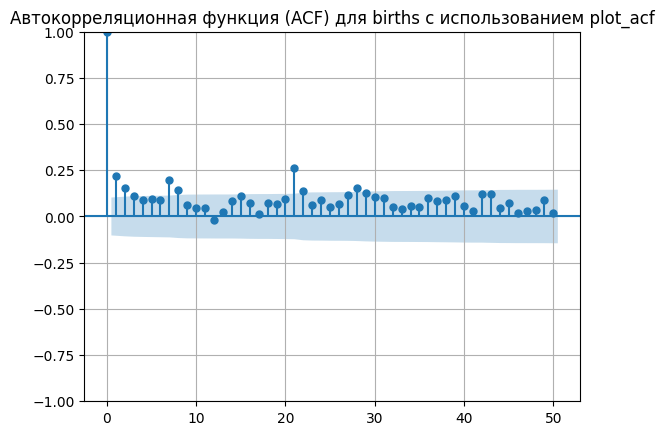

In [10]:
# Построение графика ACF с использованием функции plot_acf
plt.figure(figsize=(12, 6))
plot_acf(births, lags=50)
plt.title('Автокорреляционная функция (ACF) для births с использованием plot_acf')
plt.grid(True)
plt.show()


 Значения функции sin(x) на отрезке [0, 50] с интервалом 0.1


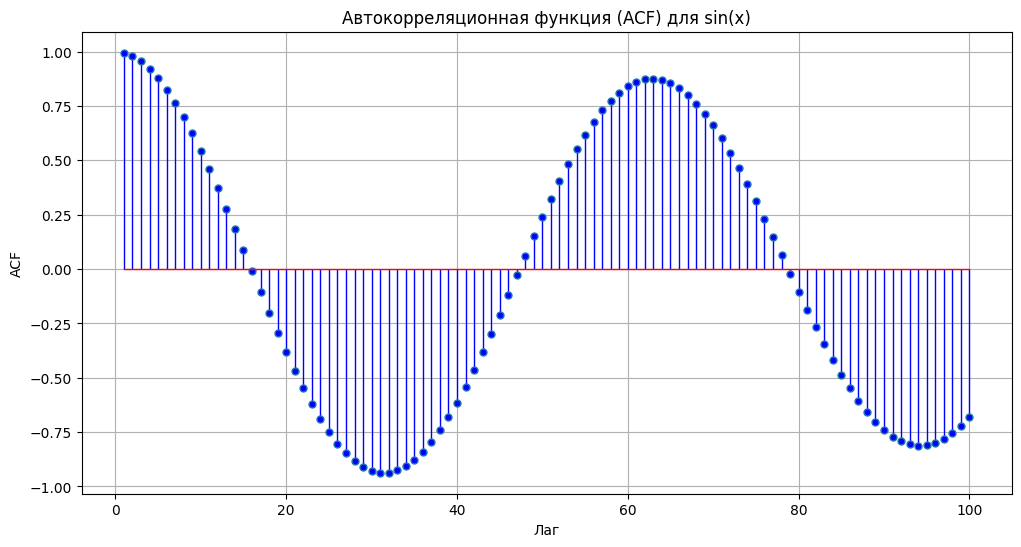

In [11]:
# Генерация данных для sin(x)
x = np.arange(0, 50, 0.1)
sin_x = np.sin(x)

# Расчет ACF для лагов от 1 до 100
max_lag = 100
acf_values_sin = calculate_acf(sin_x, max_lag)

# Построение графика ACF
plt.figure(figsize=(12, 6))
markerline, stemlines, baseline = plt.stem(range(1, max_lag + 1), acf_values_sin)
plt.setp(markerline, 'markerfacecolor', 'b', 'markersize', 5)
plt.setp(stemlines, 'color', 'b', 'linewidth', 1)
plt.setp(baseline, 'color', 'r', 'linewidth', 1)
plt.title('Автокорреляционная функция (ACF) для sin(x)')
plt.xlabel('Лаг')
plt.ylabel('ACF')
plt.grid(True)
plt.show()


 Построение графика ACF с использованием plot_acf


<Figure size 1200x600 with 0 Axes>

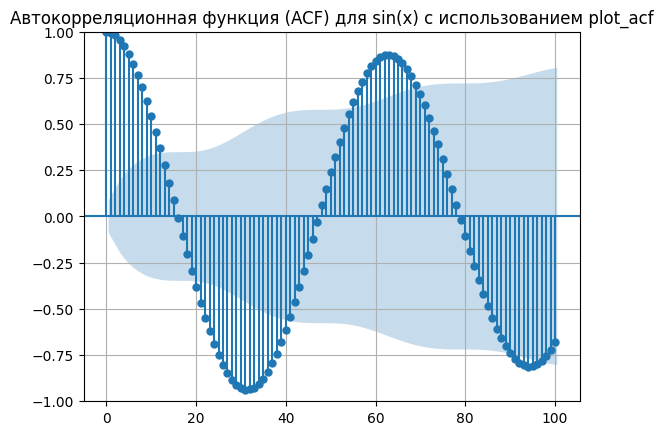

In [12]:
# Построение графика ACF с использованием функции plot_acf
plt.figure(figsize=(12, 6))
plot_acf(sin_x, lags=100)
plt.title('Автокорреляционная функция (ACF) для sin(x) с использованием plot_acf')
plt.grid(True)
plt.show()


Для периодической функции sin(x) автокорреляция также будет периодической. Пики на графике ACF будут повторяться с периодом, равным периоду функции sin(x), который составляет 2π2\pi2π (~6.28 единиц по оси x, что соответствует ~63 лагам при шаге 0.1).

Исследование стационарности датасета births с помощью теста Дики-Фуллера


In [14]:
from statsmodels.tsa.stattools import adfuller

# Проведение теста Дики-Фуллера
result = adfuller(births)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])


ADF Statistic: -4.808291253559763
p-value: 5.243412990149865e-05
Critical Values: {'1%': np.float64(-3.448748905151901), '5%': np.float64(-2.8696473721448728), '10%': np.float64(-2.5710891239349585)}


p-value (5.24e-05) ≈ 0.0000524

У нас есть статистически значимые доказательства, что ряд стационарен.
